In [ ]:
!git clone https://github.com/geneexpressionpolito/Transformers-for-gene-expression-prediction-from-raw-dna-sequences.git
!mv ./Transformers-for-gene-expression-prediction-from-raw-dna-sequences/Classes ./
!pip install import-ipynb
!gdown --folder 1u34ntvh4dL5Y5_hZSA9EDs5SZ32MPda1
import import_ipynb
import os

Mounted at /content/drive


In [ ]:
from Classes.DataManager import DataManager
from Classes.CNN1D import projCNN1D
from tensorflow import keras
import numpy as np

%load_ext tensorboard

importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/DataManager.ipynb
importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/CNN1D.ipynb
Populating the interactive namespace from numpy and matplotlib


data loading takes at most 17s

In [ ]:
dm = DataManager(transformer=False, micro=False)
X_trainhalflife, X_trainpromoter, y_train, _, _                 = dm.get_train(True, False, False)
X_validationhalflife, X_validationpromoter, y_validation, _, _  = dm.get_validation(True, False, False)
X_testhalflife, X_testpromoter, y_test, _, _                    = dm.get_test(True, False, False)

Preprocessing-> Padding

In [ ]:
leftpos  = 3_500          #3_000 
rightpos = 13_500         #13_500
maxlen   = rightpos-leftpos
print("maxlen: ",maxlen)

maxlen:  10000


In [ ]:
X_trainpromoter_p         = X_trainpromoter[:, leftpos:rightpos, :]
X_validationpromoter_p = X_validationpromoter[:, leftpos:rightpos, :]
X_testpromoter_p          = X_testpromoter[:, leftpos:rightpos, :]

INFO:tensorflow:Initializing the TPU system: grpc://10.29.30.218:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.29.30.218:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU')]
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


model built
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10000, 4)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 10000, 128)   3200        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 333, 128)     0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 333, 32)      36896       max_pooling1d[0][0]              
__________________________________________________________________________________

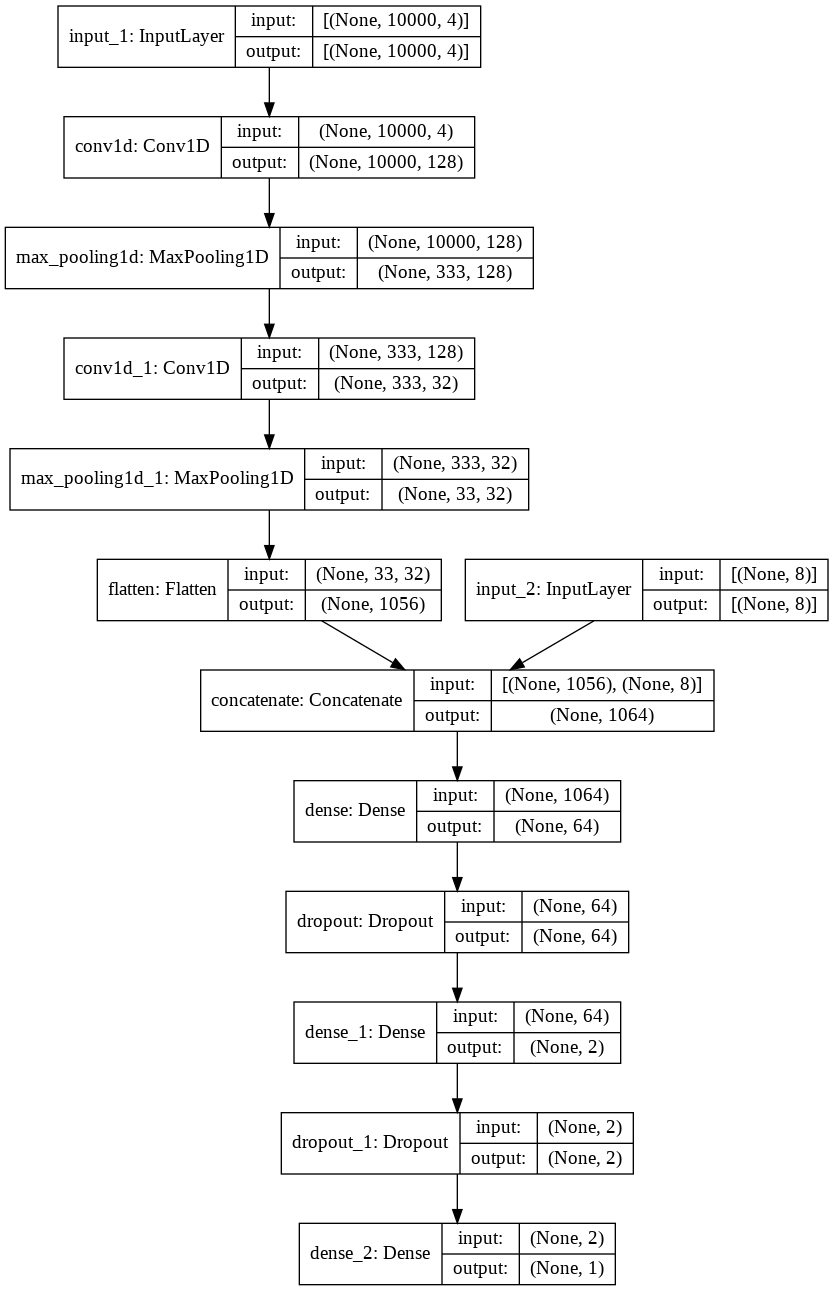


Parameters:
{'checkpoint_dir': 'Xpresso', 'model_type': 'Xpresso', 'n_epochs': 300, 'batch_size': 256, 'learning_rate': 0.0005, 'momentum': 0.9, 'CNN_input': (10000, 4), 'miRNA_input': (2064,), 'dropout_rate': 0.5, 'lr_reduction_epoch': None, 'shuffle': True, 'logdir': 'logs/Xpresso_0-006', 'patience': 30, 'opt': 'SGD', 'loss': 'mse', 'n_components_LSA': 100, 'history': '', 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7f3c5abb56d0>}



In [ ]:
# # Clear any logs from previous runs
#!rm -rf ./logs/Xpresso_0-006/
# maxlen=18850
model_type="Xpresso"
checkpoint_dir="Xpresso"
logdir = None#f"{model_type}_0-006"
loss = "mse" # "mae" "mean_squared_logarithmic_error" "mse"

######################################################################################################################
import tensorflow as tf
tf.keras.backend.clear_session()

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.experimental.TPUStrategy(resolver)


with strategy.scope():
    net = projCNN1D(checkpoint_dir=checkpoint_dir, model_type=model_type, n_epochs=300, batch_size=256, learning_rate=5e-4, CNN_input=(maxlen, 4), dropout_rate=0.5, logdir=logdir)
    
########################################################################################################################

Epoch 1/300

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
64/64 [==============================] - 11s 97ms/step - loss: 0.9638 - val_loss: 0.9083
Epoch 2/300

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
64/64 [==============================] - 2s 27ms/step - loss: 0.8686 - val_loss: 0.8582
Epoch 3/300

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
64/64 [==============================] - 2s 26ms/step - loss: 0.8312 - val_loss: 0.8296
Epoch 4/300

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
64/64 [==============================] - 2s 27ms/step - loss: 0.8055 - val_loss: 0.8024
Epoch 5/300

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
64/64 [==============================] - 2s 30ms/step - loss: 0.7791 - val_loss: 0.7728
Epoch 6/300

Epoch 00006: LearningRateScheduler reducing learning rate to 

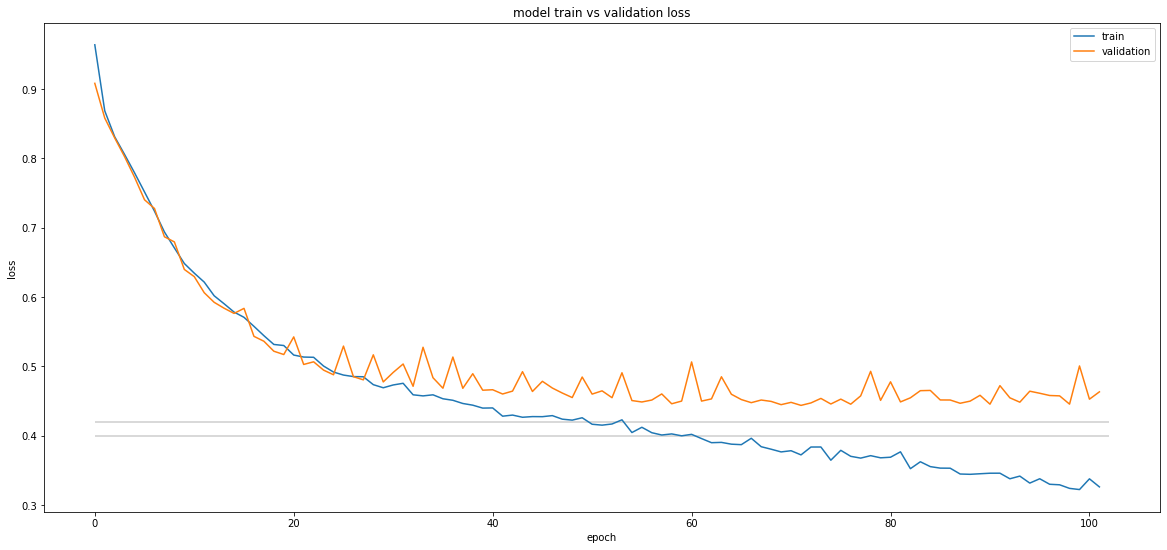

In [ ]:
net.train_model([X_trainpromoter_p, X_trainhalflife], y_train, [X_validationpromoter_p, X_validationhalflife], y_validation, TPU=True)

In [ ]:
net.evaluate([X_testpromoter_p, X_testhalflife], y_test)

Test R^2 = 0.577


0.5765585828698454

In [ ]:
net.evaluate_best([X_testpromoter_p, X_testhalflife], y_test, TPU=True)

Test R^2 = 0.577


0.5765585828698454

In [ ]:
# net.plot_train()

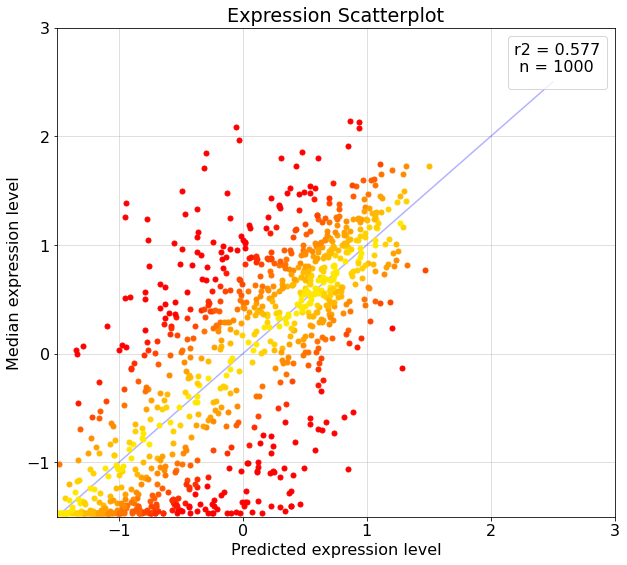

In [ ]:
net.plot_r2([X_testpromoter_p, X_testhalflife], y_test, True)

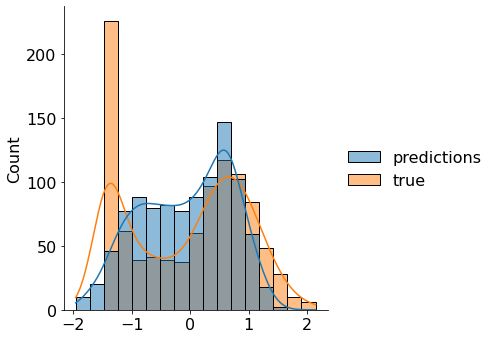

In [ ]:
net.plot_kde([X_testpromoter_p, X_testhalflife], y_test, True)

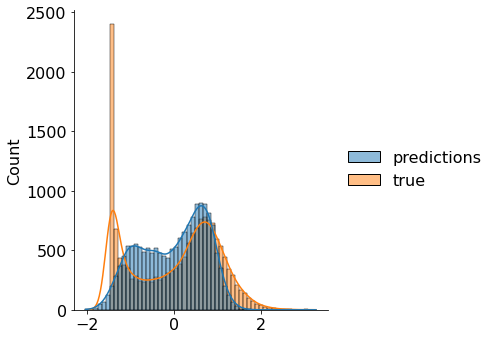

In [ ]:
net.plot_kde([X_trainpromoter_p, X_trainhalflife], y_train, True)

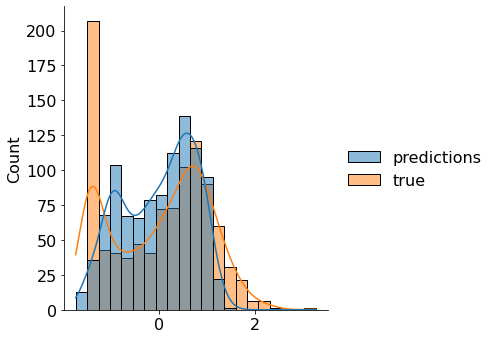

In [ ]:
net.plot_kde([X_validationpromoter_p, X_validationhalflife], y_validation, True)